##Parte 1

Cargo los dos archivos de los experimentos (ocean_safe.csv, coronadelicos_safe.csv), los convierto en dataframes y los uno descartando aquellos sujetos que no participaron de ambos experimentos.

In [ ]:
import pandas as pd

d_1 = pd.read_csv('/content/drive/MyDrive/LaboDatos2021/ocean_safe.csv')
d_2 = pd.read_csv('/content/drive/MyDrive/LaboDatos2021/coronadelicos_safe.csv')

In [ ]:
d_all = pd.merge(d_1,d_2, how="inner",on='hash')

d_all.shape

(8236, 196)

##Parte 2

Armo tres dataframes distintos basado en los siguientes criterios:

*   Sujetos que reportaron haber consumido marihuana al menos una vez.
*   Sujetos que nunca consumieron marihuana.
*   Sujetos que reportaron haber consumido sedativos y/o antidepresivos o antipsicóticos.

In [ ]:
d_ma_si = d_all.copy()    # df que contendrá a quienes consumieron marihuana
d_ma_no = d_all.copy()    # df que contendrá a quienes no consumieron marihuana

for x in d_ma_si.index:
  if d_ma_si.loc[x, "7_marihuana"] == -999:
    d_ma_si.drop(x, inplace = True)

for x in d_ma_no.index:
  if not d_ma_no.loc[x, "7_marihuana"] == -999:
     d_ma_no.drop(x, inplace = True)

In [ ]:
d_saa = d_all.copy()    # df que contendrá a quienes consumieron sedativos y/o antidepresivos o antipsicóticos

for x in d_saa.index:
  if d_saa.loc[x, "7_sedativos"] == -999 and d_saa.loc[x, "7_antidepresivos o antipsicoticos"] == -999:
    d_saa.drop(x, inplace = True)

In [ ]:
print(d_ma_si.shape)
print(d_ma_no.shape)
print(d_saa.shape)

(5182, 196)
(3054, 196)
(1742, 196)


##Partes 3 y 4

Para cada uno de los tres grupos, armo un df y me quedo solo con las colunmas de las dimensiones del modelo OCEAN. Luego los concateno en uno solo.

In [ ]:
columnas = ['1_extraversion', '1_agreeableness', '1_conscientiousness', '1_neuroticism', '1_openness']

d_ma_si_ocean = d_ma_si[columnas].copy().mean().to_frame().transpose()
d_ma_si_ocean.index = ['Marihuana']

d_ma_no_ocean = d_ma_no[columnas].copy().mean().to_frame().transpose()
d_ma_no_ocean.index = ['No marihuana']

d_saa_ocean = d_saa[columnas].copy().mean().to_frame().transpose()
d_saa_ocean.index = ['Drogas de prescripción']

d_ocean = pd.concat([d_ma_si_ocean, d_ma_no_ocean, d_saa_ocean])

In [ ]:
print(d_ocean)

                        1_extraversion  ...  1_openness
Marihuana                    25.846005  ...   38.918178
No marihuana                 25.536346  ...   37.908644
Drogas de prescripción       25.545924  ...   39.249139

[3 rows x 5 columns]


Normalizo los valores:

In [ ]:
for c in d_ocean.columns:
  d_ocean[c] /= d_ocean[c].max()

print(d_ocean)

                        1_extraversion  ...  1_openness
Marihuana                     1.000000  ...    0.991568
No marihuana                  0.988019  ...    0.965847
Drogas de prescripción        0.988390  ...    1.000000

[3 rows x 5 columns]


##Parte 4

Grafico un radar-plot con las 5 categorías del modelo OCEAN, para cada uno de los 3 grupos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def radar_plot(d_ocean, title = ''):
    categories = d_ocean.columns
    N = len(categories)
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
     
    # Initialise the spider plot
    fig, ax = plt.subplots(figsize = (6,6), subplot_kw = {'projection': 'polar'})
     
    # If you want the first axis to be on top:
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
     
    # Draw one axe per variable + add labels labels yet
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories,
                       fontsize = 12)
     
    # Draw ylabels
    ax.set_rlabel_position(0)
    ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    ax.set_yticklabels(["0.1","0.2","0.3","0.4","0.5","0.6", "0.7", "0.8", "0.9", "1"],
                       color = "darkgrey",
                       size = 7)
    ax.set_ylim(0,1)
    
    # ------- PART 2: Add plots
    
    # Plot each individual = each line of the data
    
    for row in d_ocean.iloc:
            values = row.values.flatten().tolist()
            values += values[:1]
            ax.plot(angles, values, linewidth=1.5, linestyle = 'solid', label = row.name)
            ax.fill(angles, values, 'b', alpha=0.1)
    # Add legend
    ax.legend(loc=(-0.2,-0.3),fontsize=12)
    ax.set_title(title, position=(.5, 1.2),fontsize=15,)

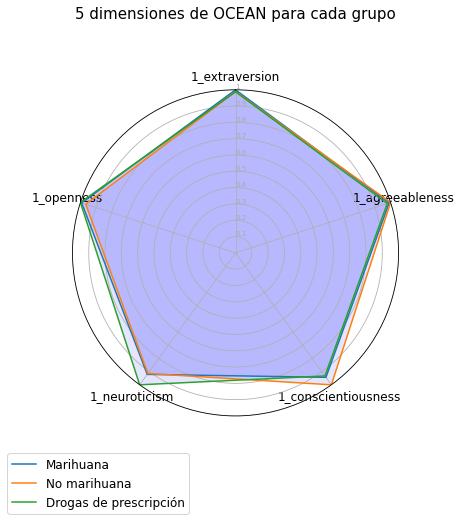

In [ ]:
radar_plot(d_ocean, title = '5 dimensiones de OCEAN para cada grupo')

La diferencia más notable entre consumidores y no consumidores de marihuana está en la dimensión de Responsabilidad (Conscientiousness), donde los segundos presentan una mayor capacidad que los segundos. Sin embargo, los consumidores tienen ligeramente un mayor grado de Apertura a la Experiencia (Openness) por sobre los primeros.

Por otra parte, el grupo de personas que han reportado consumo de sedativos y/o sedativos o antipsicóticos muestran un mayor Neuroticismo que los dos grupos anteriores (consumidores y no consumidores de marihuana).

##Parte 5

Grafico la distribución de Neuroticismo y de Responsabilidad, para cada uno de los tres grupos.

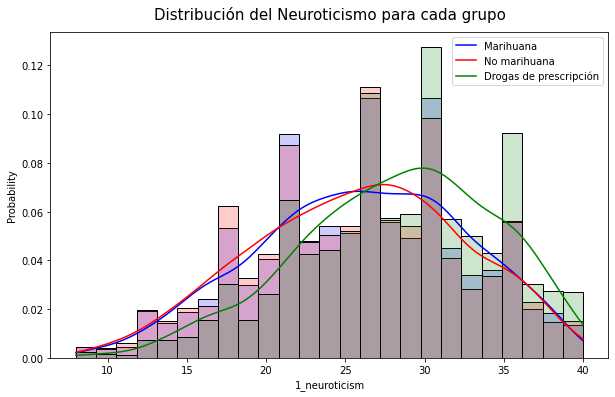

In [ ]:
import seaborn as sns

bins = 25
alpha = 0.2
title_1 = 'Distribución del Neuroticismo para cada grupo'
labels = ['Marihuana','No marihuana', 'Drogas de prescripción']
dimension_1 = '1_neuroticism' 

fig, ax = plt.subplots(figsize = (10,6))

sns.histplot(data = d_ma_si[[dimension_1]], x = dimension_1, stat = 'probability', bins = bins, color = 'b', alpha = alpha, kde = True )
sns.histplot(data = d_ma_no[[dimension_1]], x = dimension_1, stat = 'probability', bins = bins, color = "r", alpha = alpha, kde = True )
sns.histplot(data = d_saa[[dimension_1]], x = dimension_1, stat = 'probability', bins = bins, color = 'g', alpha = alpha, kde = True )

ax.set_title(title_1, position=(0.5, 1.02),fontsize=15)
plt.legend(labels)

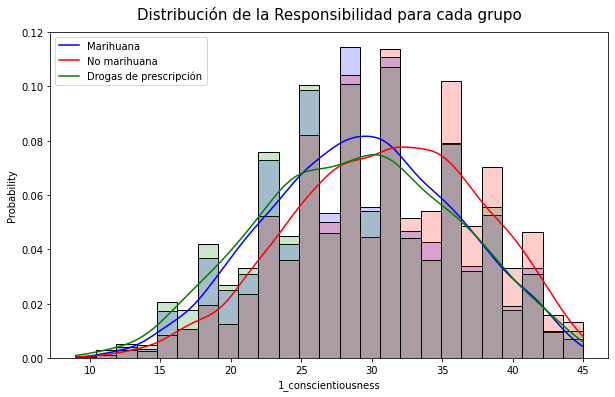

In [ ]:
title_1 = 'Distribución de la Responsibilidad para cada grupo'
labels = ['Marihuana','No marihuana', 'Drogas de prescripción']
dimension_1 = '1_conscientiousness' 

fig, ax = plt.subplots(figsize = (10,6))

sns.histplot(data = d_ma_si[[dimension_1]], x = dimension_1, stat = 'probability', bins = bins, color = 'b', alpha = alpha, kde = True )
sns.histplot(data = d_ma_no[[dimension_1]], x = dimension_1, stat = 'probability', bins = bins, color = "r", alpha = alpha, kde = True )
sns.histplot(data = d_saa[[dimension_1]], x = dimension_1, stat = 'probability', bins = bins, color = 'g', alpha = alpha, kde = True )

ax.set_title(title_1, position=(0.5, 1.02),fontsize=15)
plt.legend(labels)

##Parte 6

In [ ]:
# Valor absoluto de la D de Cohen para dos promedios 'mi' y dos desvíos estándar 'si'
def d_abs(m1, m2, s1, s2):
  return abs( (m1 - m2) / ((s1**2 + s2**2) / 2) ** 0.5 )


###Neuroticismo

Calculo la D de Cohen (d), en la dimensión de Neuroticismo, para cada para cada par posible de los tres grupos. 

In [ ]:
m_ma_si_Ne = d_ma_si['1_neuroticism'].mean()  # promedio de neuroticismo en consumidores de marihuana
s_ma_si_Ne = d_ma_si['1_neuroticism'].std()   # desvío estándar de neuroticismo en consumidores de marihuana

m_ma_no_Ne = d_ma_no['1_neuroticism'].mean()  # promedio de neuroticismo en consumidores de marihuana
s_ma_no_Ne = d_ma_no['1_neuroticism'].std()   # desvío estándar de neuroticismo en consumidores de marihuana

m_saa_Ne = d_saa['1_neuroticism'].mean()  # promedio de neuroticismo en consumidores de marihuana
s_saa_Ne = d_saa['1_neuroticism'].std()   # desvío estándar de neuroticismo en consumidores de marihuana

pares = ['Entre consumidores de Marihuana y no consumidores:', 
         'Entre consumidores de Marihuana y consumidores de sedativos y/o sedativos o antipsicóticos:',
         'Entre no consumidores de Marihuana y consumidores de sedativos y/o sedativos o antipsicóticos:']


print('{:<100}{}'.format('Grupo', 'd'))
print('-'*105)
print('{:<100}{:.3f}'.format(pares[0], d_abs(m_ma_si_Ne, m_ma_no_Ne, s_ma_si_Ne, s_ma_no_Ne)))
print('{:<100}{:.3f}'.format(pares[1], d_abs(m_ma_si_Ne, m_saa_Ne, s_ma_si_Ne, s_saa_Ne)))
print('{:<100}{:.3f}'.format(pares[2], d_abs(m_ma_no_Ne, m_saa_Ne, s_ma_no_Ne, s_saa_Ne)))


Grupo                                                                                               d
---------------------------------------------------------------------------------------------------------
Entre consumidores de Marihuana y no consumidores:                                                  0.029
Entre consumidores de Marihuana y consumidores de sedativos y/o sedativos o antipsicóticos:         0.348
Entre no consumidores de Marihuana y consumidores de sedativos y/o sedativos o antipsicóticos:      0.376


En los tres pares, la diferencia de Neuroticismo entre grupos es pequeña, especialmente entre consumidores de marihuana y no consumidores. 

###Responsabilidad

Calculo la D de Cohen (d), en la dimensión de Responsabilidad, para cada para cada par posible de los tres grupos. 

In [ ]:
m_ma_si_Re = d_ma_si['1_conscientiousness'].mean()  # promedio de neuroticismo en consumidores de marihuana
s_ma_si_Re = d_ma_si['1_conscientiousness'].std()   # desvío estándar de neuroticismo en consumidores de marihuana

m_ma_no_Re = d_ma_no['1_conscientiousness'].mean()  # promedio de neuroticismo en consumidores de marihuana
s_ma_no_Re = d_ma_no['1_conscientiousness'].std()   # desvío estándar de neuroticismo en consumidores de marihuana

m_saa_Re = d_saa['1_conscientiousness'].mean()  # promedio de neuroticismo en consumidores de marihuana
s_saa_Re = d_saa['1_conscientiousness'].std()   # desvío estándar de neuroticismo en consumidores de marihuana

print('{:<100}{}'.format('Grupo', 'd'))
print('-'*105)
print('{:<100}{:.3f}'.format(pares[0], d_abs(m_ma_si_Re, m_ma_no_Re, s_ma_si_Re, s_ma_no_Re)))
print('{:<100}{:.3f}'.format(pares[1], d_abs(m_ma_si_Re, m_saa_Re, s_ma_si_Re, s_saa_Re)))
print('{:<100}{:.3f}'.format(pares[2], d_abs(m_ma_no_Re, m_saa_Re, s_ma_no_Re, s_saa_Re)))

Grupo                                                                                               d
---------------------------------------------------------------------------------------------------------
Entre consumidores de Marihuana y no consumidores:                                                  0.265
Entre consumidores de Marihuana y consumidores de sedativos y/o sedativos o antipsicóticos:         0.047
Entre no consumidores de Marihuana y consumidores de sedativos y/o sedativos o antipsicóticos:      0.306


En los tres pares, la diferencia de Responsabilidad entre grupos es pequeña, especialmente entre consumidores de marihuana y consumidores de sedativos y/o sedativos o antipsicóticos. 